## Load Libraries

In [235]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier# Import Decision Tree Classifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn. preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,roc_curve, auc
from sklearn.model_selection import train_test_split # Import train_test_split function
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [236]:
df = pd.read_csv('X_mush.csv')

## Split dataset in features and target variable

In [238]:
feature_cols = ['age', 'gender', 'education', 'country','ethnicity','nscore','escore','oscore','ascore','cscore','impuslive','ss']
X = df[feature_cols] # Features
y = df.mushrooms # Target variable

## undersampling

In [240]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

## oversampling

In [242]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

## combining undersampling and oversampling

In [244]:
# Step 1: Undersampling the majority class
#undersample = RandomUnderSampler(sampling_strategy=0.99999, random_state=42)
#X_under, y_under = undersample.fit_resample(X, y)

# Step 2: Oversampling the minority class
#smote = SMOTE(sampling_strategy=0.5444, random_state=42)
#X_combined, y_combined = smote.fit_resample(X_under, y_under)

# Now you can split the rebalanced dataset into training and test sets
#X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.6, random_state=42)

In [245]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Undersample the majority class
undersample = RandomUnderSampler(sampling_strategy=0.9, random_state=42)
X_under, y_under = undersample.fit_resample(X, y)

# Check class distribution after undersampling
print("After undersampling:", pd.Series(y_under).value_counts())

# Calculate the ratio of the minority to the majority class after undersampling
class_counts = pd.Series(y_under).value_counts()
minority_class = class_counts.min()
majority_class = class_counts.max()

# Step 2: Adjust SMOTE's sampling_strategy based on the current class ratio
# The sampling strategy should aim for a target ratio of minority to majority classes
target_ratio = 0.5  # Adjust this to the desired ratio
desired_minority_class_size = int(target_ratio * majority_class)

# Step 3: Apply SMOTE with the calculated sampling strategy
smote = SMOTE(sampling_strategy=1, random_state=42)
X_combined, y_combined = smote.fit_resample(X_under, y_under)

# Check class distribution after SMOTE oversampling
print("After SMOTE:", pd.Series(y_combined).value_counts())

# Step 4: Split the rebalanced dataset into training and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)


After undersampling: mushrooms
non-user    771
user        694
Name: count, dtype: int64
After SMOTE: mushrooms
non-user    771
user        771
Name: count, dtype: int64


In [246]:
# Split undersampled dataset into training set and test set
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_smote, y_smote, test_size=0.3, random_state=1) # 70% training and 30% test

In [247]:
# Split oversampled dataset into training set and test set
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1) # 70% training and 30% test

## Create Decision Tree classifer object

In [249]:
clf = DecisionTreeClassifier()

# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_DT_under = accuracy_score(y_test_under, y_pred_under)
precision_DT_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_DT_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_DT_under:",accuracy_DT_under)
print("Precision_DT_under:", precision_DT_under)
print("Recall_DT_under:", recall_DT_under)

cm_DT_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_DT_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_DT_over = accuracy_score(y_test_over, y_pred_over)
precision_DT_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_DT_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_DT_over:",accuracy_DT_over)
print("Precision_DT_over:", precision_DT_over)
print("Recall_DT_over:", recall_DT_over)

cm_DT_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_DT_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_DT_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_DT_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_DT_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_DT_combined:",accuracy_DT_combined)
print("Precision_DT_combined:", precision_DT_combined)
print("Recall_DT_combined:", recall_DT_combined)

cm_DT_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_DT_combined)

Accuracy_DT_under: 0.7524475524475525
Precision_DT_under: 0.7548209366391184
Recall_DT_under: 0.7569060773480663
[[264  89]
 [ 88 274]]
Accuracy_DT_over: 0.772027972027972
Precision_DT_over: 0.7420924574209246
Recall_DT_over: 0.8425414364640884
[[247 106]
 [ 57 305]]
Accuracy_DT_combined: 0.6634304207119741
Precision_DT_combined: 0.6411764705882353
Recall_DT_combined: 0.7171052631578947
[[ 96  61]
 [ 43 109]]


## Create randomforest classifer object

In [251]:
clf = RandomForestClassifier()

# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_RF_under = accuracy_score(y_test_under, y_pred_under)
precision_RF_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_RF_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_RF_under:",accuracy_RF_under)
print("Precision_RF_under:", precision_RF_under)
print("Recall_RF_under:", recall_RF_under)

cm_RF_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_RF_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_RF_over = accuracy_score(y_test_over, y_pred_over)
precision_RF_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_RF_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_RF_over:",accuracy_RF_over)
print("Precision_RF_over:", precision_RF_over)
print("Recall_RF_over:", recall_RF_over)

cm_RF_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_RF_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_RF_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_RF_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_RF_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_RF_combined:",accuracy_RF_combined)
print("Precision_RF_combined:", precision_RF_combined)
print("Recall_RF_combined:", recall_RF_combined)

cm_RF_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_RF_combined)

Accuracy_RF_under: 0.8195804195804196
Precision_RF_under: 0.8263305322128851
Recall_RF_under: 0.8149171270718232
[[291  62]
 [ 67 295]]
Accuracy_RF_over: 0.8503496503496504
Precision_RF_over: 0.8294573643410853
Recall_RF_over: 0.8867403314917127
[[287  66]
 [ 41 321]]
Accuracy_RF_combined: 0.7896440129449838
Precision_RF_combined: 0.7735849056603774
Recall_RF_combined: 0.8092105263157895
[[121  36]
 [ 29 123]]


## Create Support Vector Machine classifer object

In [253]:
clf = svm.SVC(kernel='linear')

# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_SVM_under = accuracy_score(y_test_under, y_pred_under)
precision_SVM_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_SVM_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_SVM_under:",accuracy_SVM_under)
print("Precision_SVM_under:", precision_SVM_under)
print("Recall_SVM_under:", recall_SVM_under)

cm_SVM_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_SVM_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_SVM_over = accuracy_score(y_test_over, y_pred_over)
precision_SVM_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_SVM_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_SVM_over:",accuracy_SVM_over)
print("Precision_SVM_over:", precision_SVM_over)
print("Recall_SVM_over:", recall_SVM_over)

cm_SVM_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_SVM_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_SVM_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_SVM_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_SVM_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_SVM_combined:",accuracy_SVM_combined)
print("Precision_SVM_combined:", precision_SVM_combined)
print("Recall_SVM_combined:", recall_SVM_combined)

cm_SVM_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_SVM_combined)

Accuracy_SVM_under: 0.7888111888111888
Precision_SVM_under: 0.790633608815427
Recall_SVM_under: 0.7928176795580111
[[277  76]
 [ 75 287]]
Accuracy_SVM_over: 0.7636363636363637
Precision_SVM_over: 0.7797101449275362
Recall_SVM_over: 0.7430939226519337
[[277  76]
 [ 93 269]]
Accuracy_SVM_combined: 0.7443365695792881
Precision_SVM_combined: 0.7517241379310344
Recall_SVM_combined: 0.7171052631578947
[[121  36]
 [ 43 109]]


## Create KNN classifer object

In [255]:
clf = KNeighborsClassifier(n_neighbors=3)

# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_KNN_under = accuracy_score(y_test_under, y_pred_under)
precision_KNN_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_KNN_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_KNN_under:",accuracy_KNN_under)
print("Precision_KNN_under:", precision_KNN_under)
print("Recall_KNN_under:", recall_KNN_under)

cm_KNN_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_KNN_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_KNN_over = accuracy_score(y_test_over, y_pred_over)
precision_KNN_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_KNN_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_KNN_over:",accuracy_KNN_over)
print("Precision_KNN_over:", precision_KNN_over)
print("Recall_KNN_over:", recall_KNN_over)

cm_KNN_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_KNN_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_KNN_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_KNN_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_KNN_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_KNN_combined:",accuracy_KNN_combined)
print("Precision_KNN_combined:", precision_KNN_combined)
print("Recall_KNN_combined:", recall_KNN_combined)

cm_KNN_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_KNN_combined)

Accuracy_KNN_under: 0.7678321678321678
Precision_KNN_under: 0.7322274881516587
Recall_KNN_under: 0.8535911602209945
[[240 113]
 [ 53 309]]
Accuracy_KNN_over: 0.7608391608391608
Precision_KNN_over: 0.7279236276849642
Recall_KNN_over: 0.8425414364640884
[[239 114]
 [ 57 305]]
Accuracy_KNN_combined: 0.6990291262135923
Precision_KNN_combined: 0.6787878787878788
Recall_KNN_combined: 0.7368421052631579
[[104  53]
 [ 40 112]]


## Create MLP classifer object

In [257]:
clf =  MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_MLP_under = accuracy_score(y_test_under, y_pred_under)
precision_MLP_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_MLP_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_MLP_under:",accuracy_MLP_under)
print("Precision_MLP_under:", precision_MLP_under)
print("Recall_MLP_under:", recall_MLP_under)

cm_MLP_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_MLP_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_MLP_over = accuracy_score(y_test_over, y_pred_over)
precision_MLP_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_MLP_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_MLP_over:",accuracy_MLP_over)
print("Precision_MLP_over:", precision_MLP_over)
print("Recall_MLP_over:", recall_MLP_over)

cm_MLP_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_MLP_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_MLP_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_MLP_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_MLP_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_MLP_combined:",accuracy_MLP_combined)
print("Precision_MLP_combined:", precision_MLP_combined)
print("Recall_MLP_combined:", recall_MLP_combined)

cm_MLP_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_MLP_combined)

Accuracy_MLP_under: 0.7916083916083916
Precision_MLP_under: 0.7642679900744417
Recall_MLP_under: 0.850828729281768
[[258  95]
 [ 54 308]]
Accuracy_MLP_over: 0.7734265734265734
Precision_MLP_over: 0.773224043715847
Recall_MLP_over: 0.7817679558011049
[[270  83]
 [ 79 283]]
Accuracy_MLP_combined: 0.7443365695792881
Precision_MLP_combined: 0.7085714285714285
Recall_MLP_combined: 0.8157894736842105
[[106  51]
 [ 28 124]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

## Create GB classifer object

In [259]:
clf =  GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)

# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_GB_under = accuracy_score(y_test_under, y_pred_under)
precision_GB_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_GB_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_GB_under:",accuracy_GB_under)
print("Precision_GB_under:", precision_GB_under)
print("Recall_GB_under:", recall_GB_under)

cm_GB_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_GB_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_GB_over = accuracy_score(y_test_over, y_pred_over)
precision_GB_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_GB_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_GB_over:",accuracy_GB_over)
print("Precision_GB_over:", precision_GB_over)
print("Recall_GB_over:", recall_GB_over)

cm_GB_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_DT_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_GB_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_GB_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_GB_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_GB_combined:",accuracy_GB_combined)
print("Precision_GB_combined:", precision_GB_combined)
print("Recall_GB_combined:", recall_GB_combined)

cm_GB_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_GB_combined)

Accuracy_GB_under: 0.7986013986013986
Precision_GB_under: 0.7978142076502732
Recall_GB_under: 0.8066298342541437
[[279  74]
 [ 70 292]]
Accuracy_GB_over: 0.7482517482517482
Precision_GB_over: 0.7446236559139785
Recall_GB_over: 0.7651933701657458
[[247 106]
 [ 57 305]]
Accuracy_GB_combined: 0.7896440129449838
Precision_GB_combined: 0.7843137254901961
Recall_GB_combined: 0.7894736842105263
[[124  33]
 [ 32 120]]


## ROC Curve for Undersampled Data

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


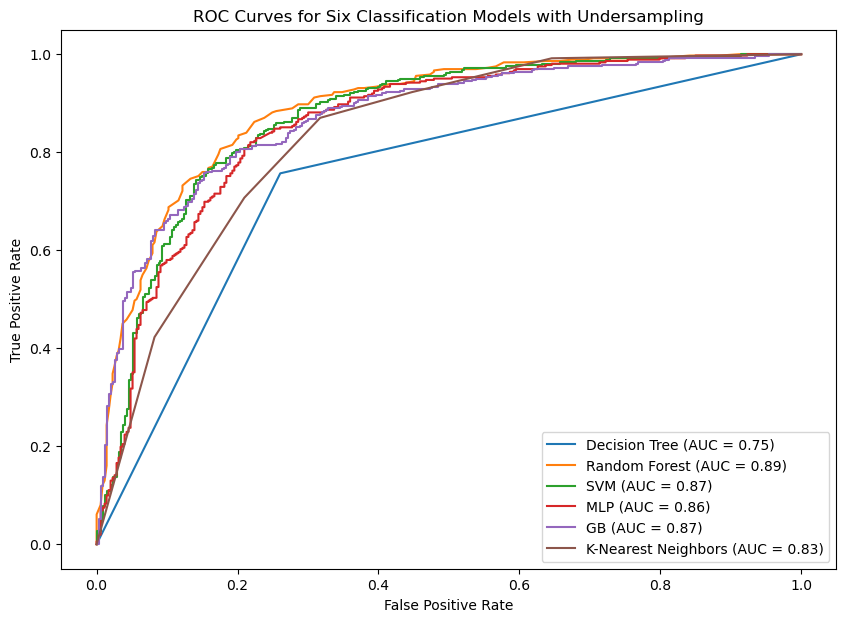

In [261]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': svm.SVC(probability=True),
    'MLP': MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Plotting the ROC curves
plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_under, y_train_under)
    
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test_under)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_under, y_prob, pos_label = 'user')
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Six Classification Models with Undersampling')
plt.legend()

# Display the plot
plt.show()

## ROC Curve for Oversampled Data

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


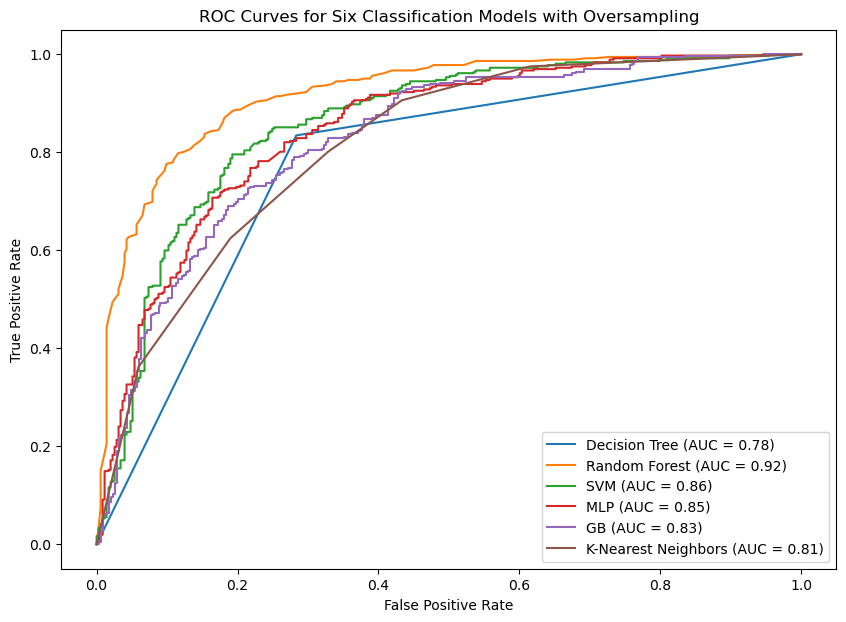

In [263]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': svm.SVC(probability=True),
    'MLP': MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Plotting the ROC curves
plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_over, y_train_over)
    
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test_over)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_over, y_prob, pos_label = 'user')
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Six Classification Models with Oversampling')
plt.legend()

# Display the plot
plt.show()

## ROC Curves Combined Data

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


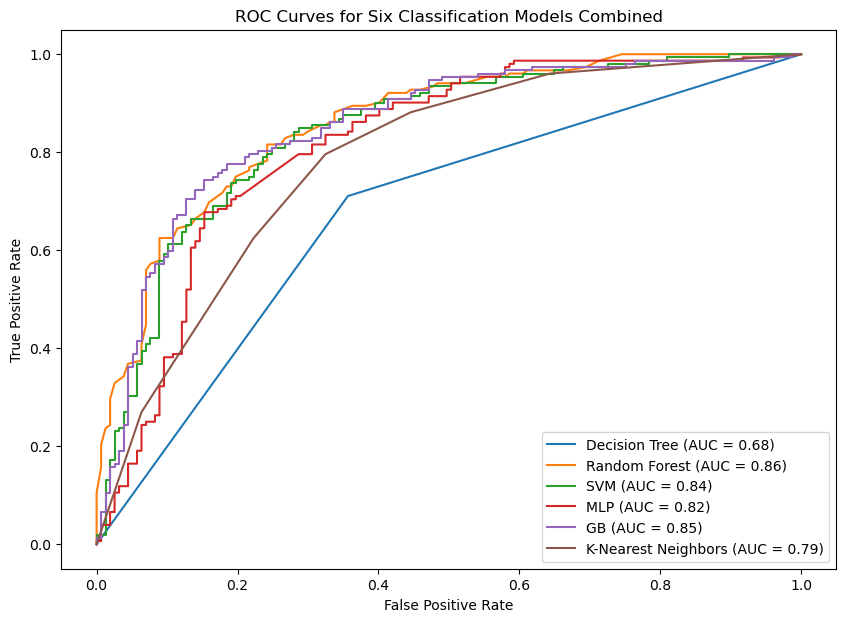

In [265]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': svm.SVC(probability=True),
    'MLP': MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Plotting the ROC curves
plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_combined, y_train_combined)
    
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test_combined)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_combined, y_prob, pos_label = 'user')
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Six Classification Models Combined')
plt.legend()

# Display the plot
plt.show()